## 1. What is Tic Tac Toe ?

A fairly simple game which we have been playing since childhood. In case you are not familiar with the game you can read more about it [here](https://en.wikipedia.org/wiki/Tic-tac-toe) or watch this short video.

In [43]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/USEjXNCTvcc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The simplicity of the game makes it very suitable for pedagogical purposes, that is one of the reason why we find Tic-Tac-Toe so much in Artificial Intelligence literature.

We will discuss about making the computer learn to play Tic-Tac-Toe. We will start with very basic deterministic way of solving Tic-Tac-Toe and slowly move to making the computer LEARN to play Tic-Tac-Toe. We will also examine some of our own strategies while playing this game and can the computer learn these startegies. At times we must have come across a strategy, that putting a X or an O at the center always leads to draw and hence a safe move is to simply put an X or O at the center. 

## 2. ROTE Learning way (or the NOT so learning way)

One unique feature of this game is that it has less number of possible game states. A game state is a description of the positions of X's and O's at a given point in time in the game.

So the initial game state looks like the empty game figure. The next game state look like the figure corresponding to one of the possible game moves made by the first player, say X. Although there are 9 possible moves of which only 3 are distinct if we consider symmetry. All these game states cane be depicted in form of a [game tree](https://en.wikipedia.org/wiki/Game_tree) . Game trees allow us to enumerate all possible scenarios in the game. Take look at the figure below for game tree associated with Tic-Tac-Toe.

![Gamge States](https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Tic-tac-toe-game-tree.svg/545px-Tic-tac-toe-game-tree.svg.png)

There are some states which are losing and some other states which are winning. You might have guessed the meaning, but let us define it more rigorously. A state is called winning for *X* if either of the following holds true:
1. Player *X* has won the game. (the obvious win)
2. There exists **NO** such path in the tree (sub-tree) starting from the given state which will **NOT** land player <i>X</i> in an obvious win state as described in 1. (Or we can say every path will land player *X* into an obvious win state)

In an analogous way we can define winning states for O's. Similarly we can also defining a losing state. (try defining losing state precisely) 

### 2.1 The ROTE Learning approach

As the name suggest this is very straight forward. Make a tree and figure out all winning states and losing states for a given player. If it is a winning state give a high score to the player, if it is a losing state give a penalizing score and if it is neither then give a zero.

---
***Algorithm 2.1.1***

GetStateScore(**state**, **player**):
1. **GameTree** $\leftarrow$ A representation of game tree.
2. **If** **state** is winning for **player** in **GameTree**:
   - **Then** **return** 100
   - **Else If** **state** is losing for **player** in **GameTree**:
       - **Then** **return** -100
   - **Else**
       - **return** 0

---

The actual difficulty in the above algorithm is figuring out if a state is winning or not. One possible way, is to use the game tree itself and ensure that all path in all subtrees starting from the given state, ends up making the given player win. This is again relatively straight forward if you are familiar with [graph theory](https://en.wikipedia.org/wiki/Graph_theory) and [BFS](https://en.wikipedia.org/wiki/Breadth-first_search) or [DFS](https://en.wikipedia.org/wiki/Depth-first_search).

## 3. The Minimax way

If you have heard of the minimax algorithm then this is probably one of the most widely used ways to solve this type of problems. The core idea of this class of algorithm is to make sure that you always consider your opponents best possible moves before making yours. As the name suggests, Min-Max, find the minimum of the maximum possible score of your opponent or in other words minimize your damage in worst case.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from graphviz import Source
from sklearn.model_selection import train_test_splitain
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [31]:
data = pd.read_csv("ticTacToeScore.csv")
data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,O0,O1,O2,O3,O4,O5,O6,O7,O8,IsO,score
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
o_winning = training_data[(training_data.IsO == 1) & (training_data.score == 100)]
x_winning = training_data[(training_data.IsO == 0) & (training_data.score == 100)]

In [26]:
x_training_data = (training_data[(training_data.IsO == 0)]).drop(columns=["IsO"])
o_training_data = (training_data[(training_data.IsO == 1)]).drop(columns=["IsO"])
x_training_data.reset_index(drop=True, inplace=True)
o_training_data.reset_index(drop=True, inplace=True)
x_score = [score for score in x_training_data["score"]]
o_score = [score for score in o_training_data["score"]]
t_score = [score for score in training_data["score"]]
x_class = [int(score/100 + 1) for score in x_score]
o_class = [int(score/100 + 1) for score in o_score]
t_class = [int(score/100 + 1) for score in t_score]

In [27]:
x_train = x_training_data.drop(columns=["score"])
o_train = o_training_data.drop(columns=["score"])
t_train = training_data.drop(columns=["score"])

In [28]:
x_model = LinearRegression().fit(x_train, x_score)
o_model = LinearRegression().fit(o_train, o_score)
t_model = LinearRegression().fit(t_train, t_score)

In [8]:
x_acc_linear_reg = x_model.score(x_train, x_score)
o_acc_linear_reg = o_model.score(o_train, o_score)
t_acc_linear_reg = t_model.score(t_train, t_score)

In [9]:
print("Accuracy for X = {}, Accuracy for O = {}, Accuracy for whole = {}".format(x_acc_linear_reg, o_acc_linear_reg, t_acc_linear_reg))
print(x_model.coef_, " * state + ", x_model.intercept_)
print(o_model.coef_, " * state + ", o_model.intercept_)
print(t_model.coef_, " * state + ", t_model.intercept_)

Accuracy for X = 0.2359100795453818, Accuracy for O = 0.23591007954538165, Accuracy for whole = 0.04589685506039243
[ 69.71383658  48.3715394   69.71383658  48.3715394   95.21678634
  48.3715394   69.71383658  48.3715394   69.71383658 -48.13167897
 -35.40737807 -48.13167897 -35.40737807 -53.08796566 -35.40737807
 -48.13167897 -35.40737807 -48.13167897]  * state +  -107.77964267296042
[-48.13167897 -35.40737807 -48.13167897 -35.40737807 -53.08796566
 -35.40737807 -48.13167897 -35.40737807 -48.13167897  69.71383658
  48.3715394   69.71383658  48.3715394   95.21678634  48.3715394
  69.71383658  48.3715394   69.71383658]  * state +  -107.77964267296349
[ 1.33324106e+01  7.15469088e+00  1.33324106e+01  7.15469088e+00
  2.55306761e+01  7.15469088e+00  1.33324106e+01  7.15469088e+00
  1.33324106e+01  1.33324106e+01  7.15469088e+00  1.33324106e+01
  7.15469088e+00  2.55306761e+01  7.15469088e+00  1.33324106e+01
  7.15469088e+00  1.33324106e+01 -1.01252340e-13]  * state +  -90.85302001110733


In [10]:
x_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=50).fit(x_train, x_score)
o_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=10).fit(o_train, o_score)
t_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=10).fit(t_train, t_score)

In [11]:
graph = Source(tree.export_graphviz(x_model, out_file=None, feature_names=x_train.columns))

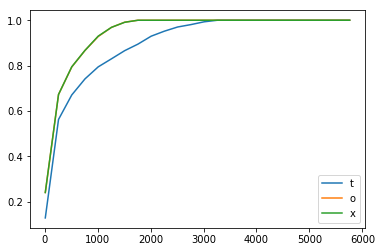

In [12]:
t_acc = []
x_acc = []
o_acc = []
x = [i for i in range(10, 6000, 250)]
for i in x:
    t_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=i).fit(t_train, t_score)
    t_acc.append(t_model.score(t_train, t_score))
for i in x:
    x_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=i).fit(x_train, x_score)
    x_acc.append(x_model.score(x_train, x_score))
for i in x:
    o_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=i).fit(o_train, o_score)
    o_acc.append(o_model.score(o_train, o_score))    
plt.plot(x, t_acc, label='t')
plt.plot(x, x_acc, label='o')
plt.plot(x, o_acc, label='x')
plt.legend()

In [13]:
x_model = MLPRegressor(random_state=1, max_iter=3500, solver='lbfgs', early_stopping=True, activation='logistic').fit(x_train, x_score)

In [14]:
x_model.score(x_train, x_score)

0.773482169075109

In [15]:
#Converting the regression problem to classification problem
#x_class_model = MLPClassifier(random_state=1, max_iter=1000, activation='relu').fit(x_train, x_class)
t_class_model = MLPClassifier(random_state=1, max_iter=950, activation='relu').fit(t_train, t_class)

In [16]:
#x_class_model.score(x_train, x_class)
t_class_model.score(t_train, t_class)

1.0

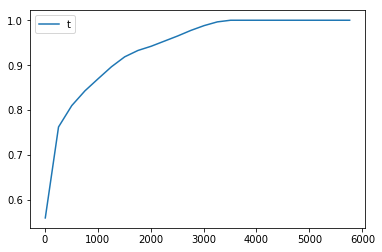

In [17]:
t_class_acc = []
x = [i for i in range(10, 6000, 250)]
for i in x:
    t_class_model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=i).fit(t_train, t_class)
    t_class_acc.append(t_class_model.score(t_train, t_class))
plt.plot(x, t_class_acc, label='t')
plt.legend()

In [18]:
x_class_model = LogisticRegression(multi_class='auto', solver='lbfgs').fit(x_train, x_class)

In [19]:
print(x_class_model.score(x_train, x_class))
print(x_class_model.coef_, " * state + ", x_class_model.intercept_)

0.6016067190067556
[[-1.08117725 -0.77468022 -1.08117725 -0.77468022 -1.56284699 -0.77468022
  -1.08117725 -0.77468022 -1.08117725  0.91620433  0.64007097  0.91620433
   0.64007097  0.91947109  0.64007097  0.91620433  0.64007097  0.91620433]
 [-0.12796582  0.0266686  -0.12796582  0.0266686   0.0954271   0.0266686
  -0.12796582  0.0266686  -0.12796582 -0.42224774 -0.23918628 -0.42224774
  -0.23918628 -0.19057815 -0.23918628 -0.42224774 -0.23918628 -0.42224774]
 [ 1.20914307  0.74801161  1.20914307  0.74801161  1.46741989  0.74801161
   1.20914307  0.74801161  1.20914307 -0.49395659 -0.40088469 -0.49395659
  -0.40088469 -0.72889294 -0.40088469 -0.49395659 -0.40088469 -0.49395659]]  * state +  [ 1.61844104  0.56889277 -2.18733381]
